# Customer Personality Analysis

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [ ]:
import pandas as pd
import scipy.stats as stats
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['marketing_campaign.csv']), delimiter="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
# basic statistics
print(df.describe())
print()

# statistics of the object datatype data
print(df.describe(include='object'))
print()

# Define data types of all columns
df.info()
print()

# print the unique values or the categories of categorical fwatures:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)
        print(df[column].unique())
        print()

# 1: missing values for each column
print(df.isnull().sum())
print()

# drop th Nan values
df = df.dropna()
print(df.isna().sum())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

### **Visualization**

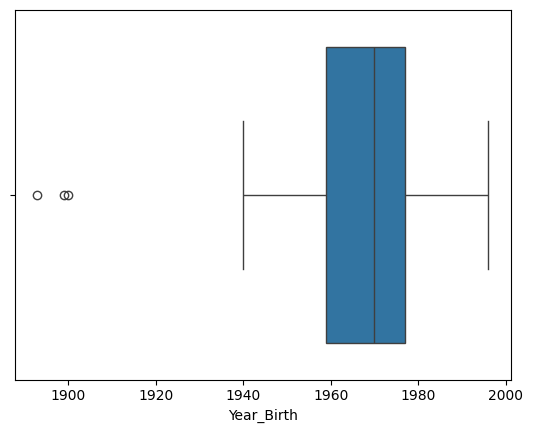

In [ ]:
sns.boxplot(data=df, x="Year_Birth")
plt.show()


Very few outlieres exist (only 3) from the 19th century. I drop them. Most of  customers were born between the 60s and the 80s

In [ ]:
# calculate the Z-score for each value in column
z_scores = np.abs((df['Year_Birth'] - df['Year_Birth'].mean()) / df['Year_Birth'].std())

# drop rows with Z-scores greater than 3
df = df[z_scores <= 3]

print(df.shape)

(2213, 29)


Outliers dropped successfully

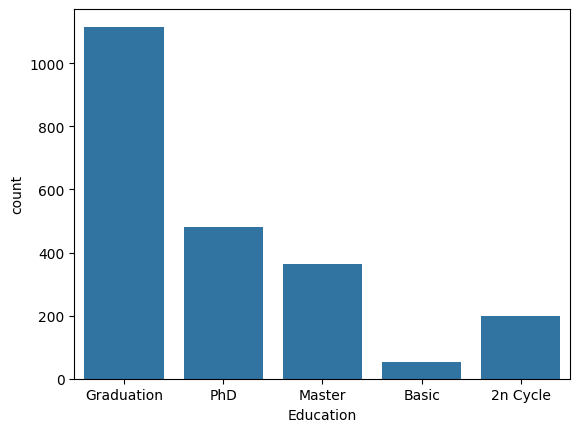

In [ ]:
sns.countplot(data=df, x="Education")
plt.show()

Most customers had a graduation level education while the Least amount had Basic level



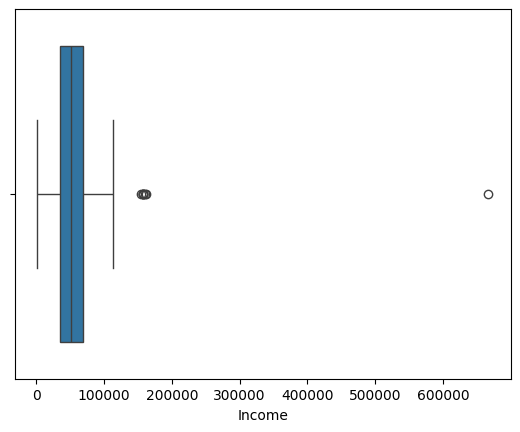

In [ ]:
sns.boxplot(data=df, x="Income")
plt.show()

Very few outliers so i drop them

In [ ]:
# calculate the Z-score for each value in column
z_scores = np.abs((df['Income'] - df['Income'].mean()) / df['Income'].std())

# drop rows with Z-scores greater than 3
df = df[z_scores <= 3]

print(df.shape)

(2205, 29)


Outliers dropped successfully

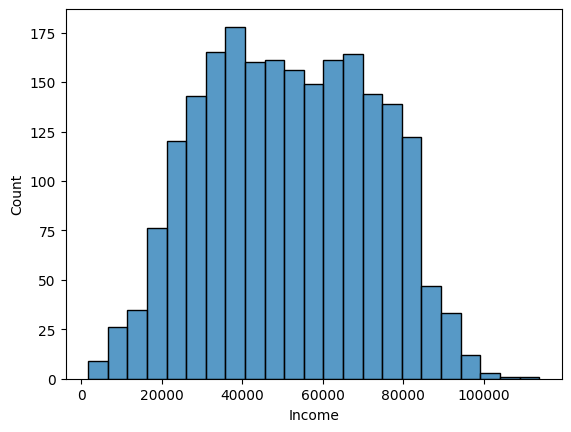

In [ ]:
sns.histplot(data=df, x="Income")
plt.show()

Most customers have income between 40000 and 80000

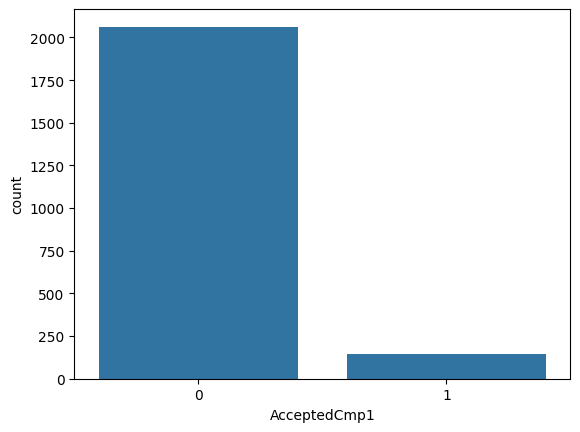

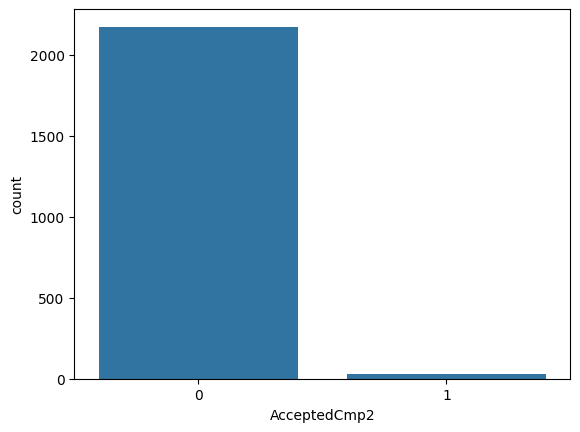

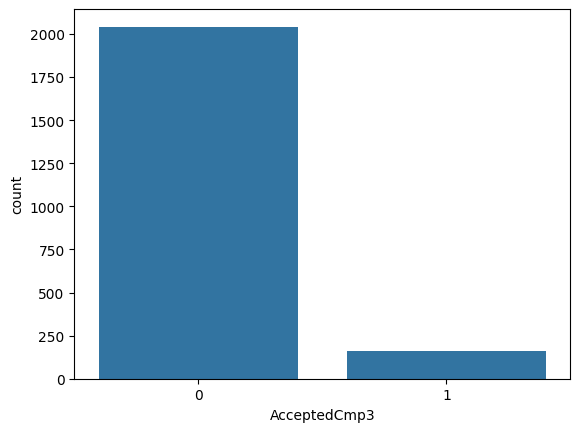

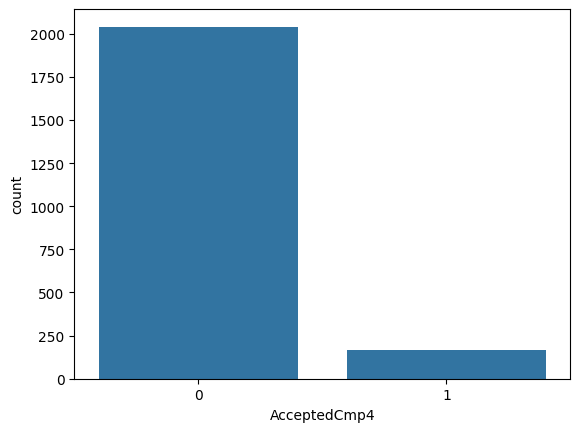

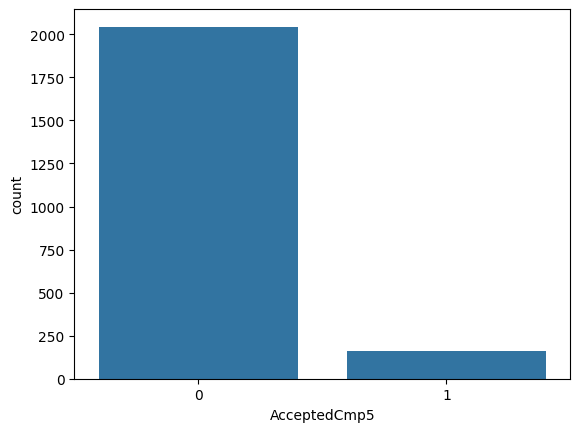

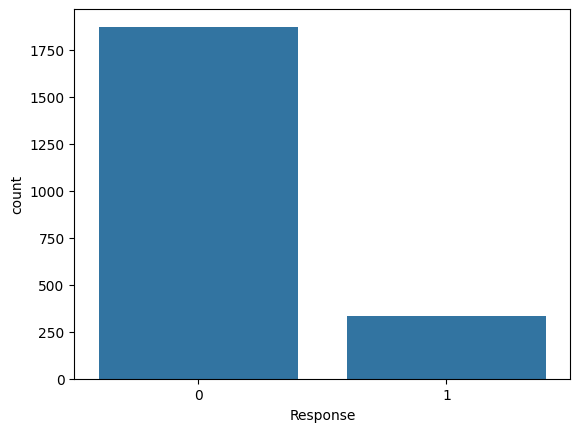

In [ ]:
cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
for i in cols:
    sns.countplot(data=df, x=i)
    plt.show()

It seems that the Last Campaign was the most successful one and the Second Campaign was the least successful one
The rest were nearly equal

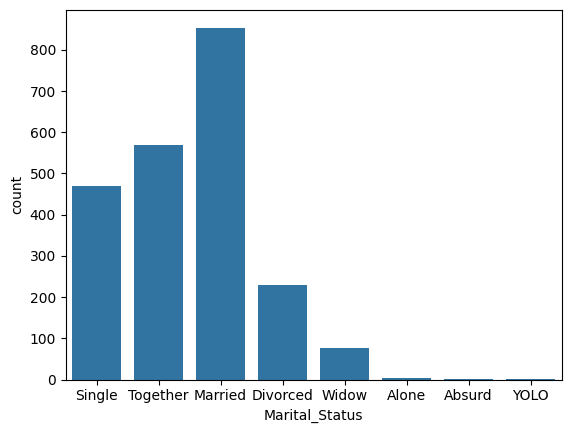

In [ ]:
sns.countplot(data=df, x="Marital_Status")
plt.show()

Absurd and YOLO seem to be very little in amount here so I'll drop them


In [ ]:
print(len(df[df["Marital_Status"] == "Absurd"]))
print(len(df[df["Marital_Status"] == "YOLO"]))
print(len(df))

df = df[~df["Marital_Status"].isin(["Absurd", "YOLO"])]

print(len(df[df["Marital_Status"] == "Absurd"]))
print(len(df[df["Marital_Status"] == "YOLO"]))
print(len(df))

2
2
2205
0
0
2201


### Hypothesis Testing

1:

H0 (Null Hypothesis): There is no significant difference in income levels among customers with different education levels.

H1 (Alternative Hypothesis): There is a significant difference in income levels among customers with different education levels.

Kruskal-Wallis H Statistic:
140.11991249406134

P-value:
2.6605568012607163e-29

Reject the null hypothesis: There is a significant difference in income levels among education levels.



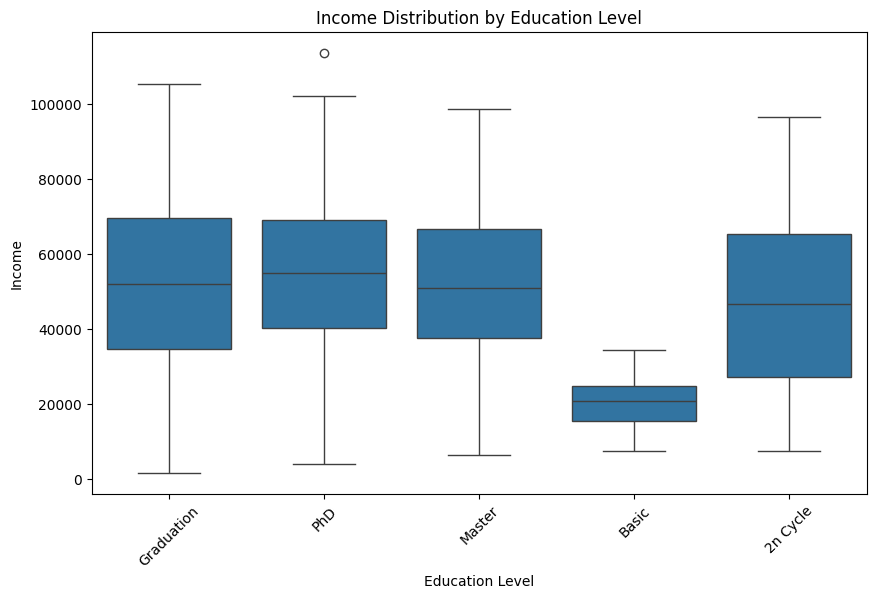

In [ ]:
from scipy.stats import kruskal

# Drop rows with missing income values
df = df.dropna(subset=['Income'])

# Group income by education level
education_groups = df.groupby('Education')['Income'].apply(list)

# Perform Kruskal-Wallis H test
h_statistic, p_value = kruskal(*education_groups)

print("Kruskal-Wallis H Statistic:")
print(h_statistic)
print()
print("P-value:")
print(p_value)
print()


if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in income levels among education levels.")
    print()
else:
    print("Fail to reject the null hypothesis: There is no significant difference in income levels among education levels.")
    print()

# Plotting the income distribution by education level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

2:

H0 (Null Hypothesis):  there is no significant difference in spending behavior between customers who received the campaign and those who did not.

H1 (Alternative Hypothesis):  there is a significant difference in spending behavior between customers who received the campaign and those who did not.

Shapiro-Wilk p-value (Campaign Group):
4.4484650500614455e-12

Shapiro-Wilk p-value (No Campaign Group):
1.7745478269729e-38

Test Used:
Mann-Whitney U Test

Test Statistic::
428556.5

P-value:
5.552195334026083e-29

Reject the null hypothesis: The marketing campaign influences spending behavior.



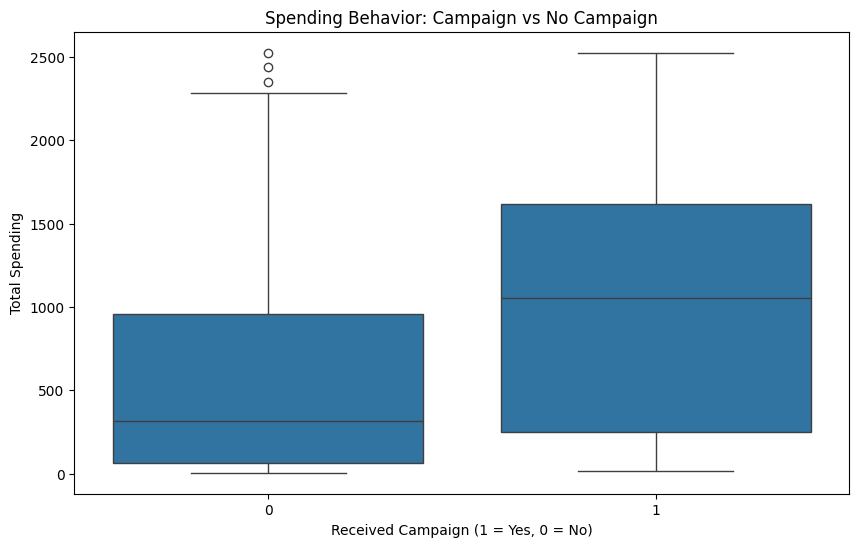

In [ ]:
from scipy.stats import mannwhitneyu, ttest_ind, shapiro

# Define spending behavior as the sum of all spending columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpending'] = df[spending_columns].sum(axis=1)

# Separate customers who received the campaign (Response = 1) and those who did not (Response = 0)
campaign_group = df[df['Response'] == 1]['TotalSpending']
no_campaign_group = df[df['Response'] == 0]['TotalSpending']

# Check normality of the spending data using Shapiro-Wilk test
_, p_campaign = shapiro(campaign_group)
_, p_no_campaign = shapiro(no_campaign_group)


print("Shapiro-Wilk p-value (Campaign Group):")
print(p_campaign)
print()
print("Shapiro-Wilk p-value (No Campaign Group):")
print(p_no_campaign)
print()

# Perform the appropriate test based on normality

if p_campaign > 0.05 and p_no_campaign > 0.05:
    # Data is normally distributed, use Independent Samples T-test
    t_statistic, p_value = ttest_ind(campaign_group, no_campaign_group)
    test_used = "Independent Samples T-test"
else:
    # Data is not normally distributed, use Mann-Whitney U Test
    u_statistic, p_value = mannwhitneyu(campaign_group, no_campaign_group)
    test_used = "Mann-Whitney U Test"


print("Test Used:")
print(test_used)
print()

if test_used == 'Independent Samples T-test':
    print("Test Statistic::")
    print(t_statistic)
    print()
else:
    print("Test Statistic::")
    print(u_statistic)
    print()


print("P-value:")
print(p_value)
print()

if p_value < 0.05:
    print("Reject the null hypothesis: The marketing campaign influences spending behavior.")
    print()
else:
    print("Fail to reject the null hypothesis: The marketing campaign does not influence spending behavior.")
    print()

# Plotting the spending behavior distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='TotalSpending', data=df)
plt.title('Spending Behavior: Campaign vs No Campaign')
plt.xlabel('Received Campaign (1 = Yes, 0 = No)')
plt.ylabel('Total Spending')
plt.show()

3:

H0 (Null Hypothesis):  there is no significant difference in spending behavior between the two groups.

H1 (Alternative Hypothesis): there is a significant difference in spending behavior between the two groups.

Mann-Whitney U Statistic:
198854.5

P-value:
5.406858767067534e-106

Reject the null hypothesis: Customers with children spend differently than those without children.



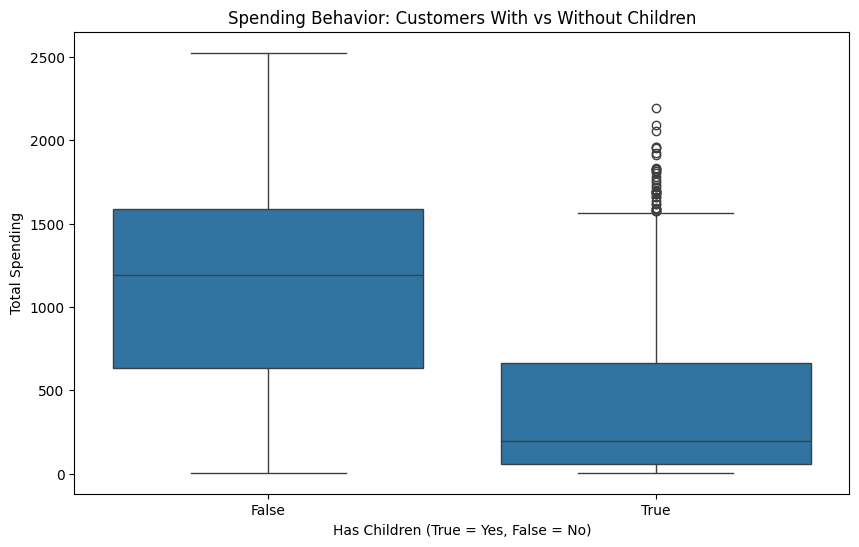

In [ ]:
from scipy.stats import mannwhitneyu

# Define spending behavior as the sum of all spending columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpending'] = df[spending_columns].sum(axis=1)

# Separate customers with children (Kidhome + Teenhome > 0) and those without (Kidhome + Teenhome = 0)
df['HasChildren'] = df['Kidhome'] + df['Teenhome'] > 0
with_children = df[df['HasChildren']]['TotalSpending']
without_children = df[~df['HasChildren']]['TotalSpending']

# Perform Mann-Whitney U Test (non-parametric test for comparing two independent groups)
u_statistic, p_value = mannwhitneyu(with_children, without_children)

print("Mann-Whitney U Statistic:")
print(u_statistic)
print()
print("P-value:")
print(p_value)
print()

if p_value < 0.05:
    print("Reject the null hypothesis: Customers with children spend differently than those without children.")
    print()
else:
    print("Fail to reject the null hypothesis: Customers with children do not spend differently than those without children.")
    print()

# Plotting the spending behavior distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='HasChildren', y='TotalSpending', data=df)
plt.title('Spending Behavior: Customers With vs Without Children')
plt.xlabel('Has Children (True = Yes, False = No)')
plt.ylabel('Total Spending')
plt.show()

4;

H0 (Null Hypothesis): There is no significant difference in spending across different product categories

H1 (Alternative Hypothesis): There is a significant difference in spending across different product categories

Friedman Test Statistic:
5846.870183284754

P-value:
0.0

Reject the null hypothesis: There is a significant difference in spending across product categories.



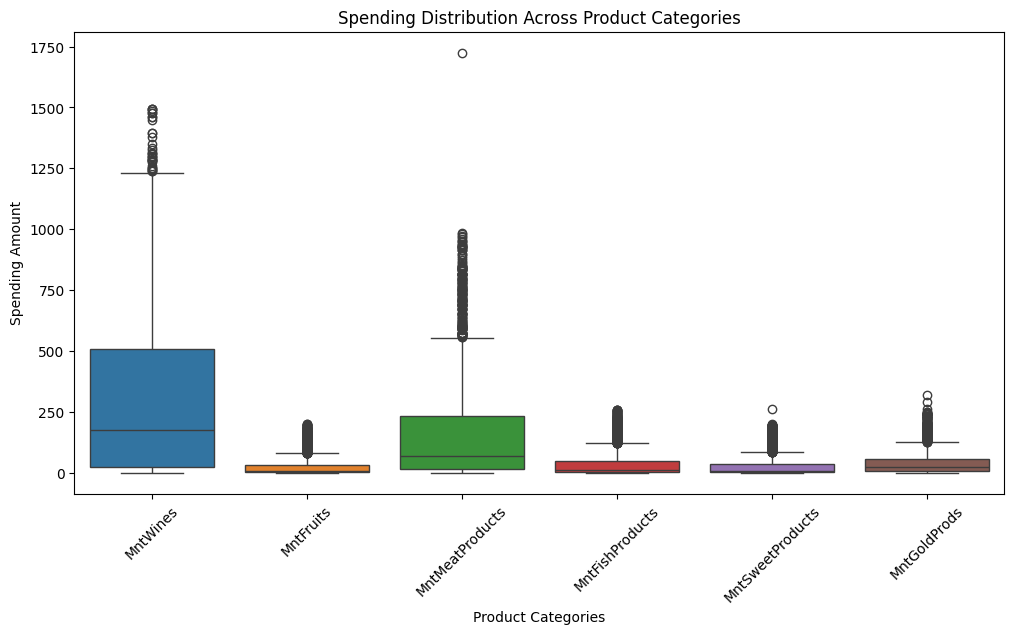

In [ ]:
from scipy.stats import friedmanchisquare

spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

spending_data = []
for column in spending_columns:
    spending_data.append(df[column])

# Perform the Friedman Test
friedman_statistic, p_value = friedmanchisquare(*spending_data)

print("Friedman Test Statistic:")
print(friedman_statistic)
print()
print("P-value:")
print(p_value)
print()

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in spending across product categories.")
    print()
else:
    print("Fail to reject the null hypothesis: There is no significant difference in spending across product categories.")
    print()

# Plotting the spending distribution across product categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[spending_columns])
plt.title('Spending Distribution Across Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Spending Amount')
plt.xticks(rotation=45)
plt.show()

5:

H0 (Null Hypothesis): There is no relationship between customer education level and acceptance of promotional campaigns

H1 (Alternative Hypothesis): There is a relationship between customer education level and acceptance of promotional campaigns

Contingency Table:
Response      0    1
Education           
2n Cycle    176   22
Basic        52    2
Graduation  961  151
Master      307   56
PhD         374  100
Chi-Square Statistic:
23.333703320850276

P-value:
0.00010859738991304676

Reject the null hypothesis: There is a significant relationship between education level and campaign acceptance.



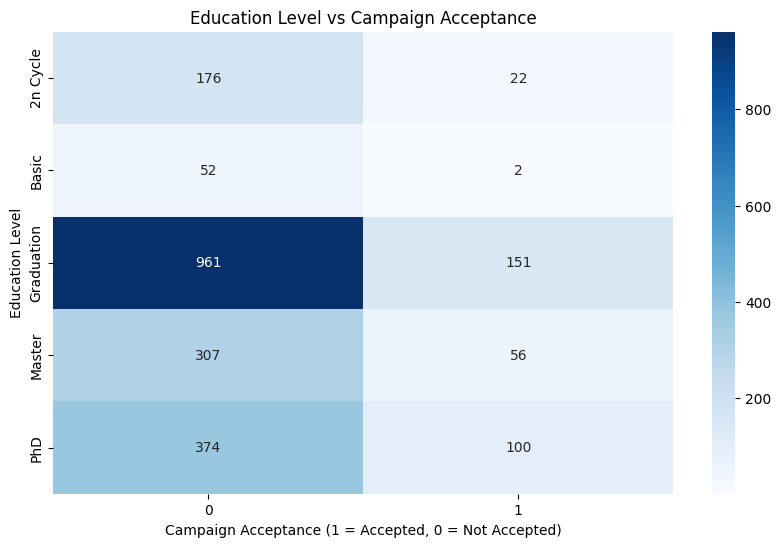

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table of Education vs Campaign Acceptance
contingency_table = pd.crosstab(df['Education'], df['Response'])

print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square Test for Independence
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:")
print(chi2_statistic)
print()
print("P-value:")
print(p_value)
print()

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between education level and campaign acceptance.")
    print()
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between education level and campaign acceptance.")
    print()

# Plotting the relationship between Education and Campaign Acceptance
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Education Level vs Campaign Acceptance')
plt.xlabel('Campaign Acceptance (1 = Accepted, 0 = Not Accepted)')
plt.ylabel('Education Level')
plt.show()

### Additional Tests and Visualizations

1.Relationship Between Income and Spending Behavior


Hypothesis:
H0: There is no significant correlation between customer income and total spending.

H1: There is a significant correlation between customer income and total spending.

Test:
 Spearman's Rank Correlation Test (for monotonic relationships). because :Spearman's correlation is more  robust and It provides meaningful insights even when the relationship between variables is not strictly linear.

Spearman Correlation:
0.8601746860697305

P-value:
0.0

Reject the null hypothesis: There is a significant monotonic relationship between Income and Total Spending.



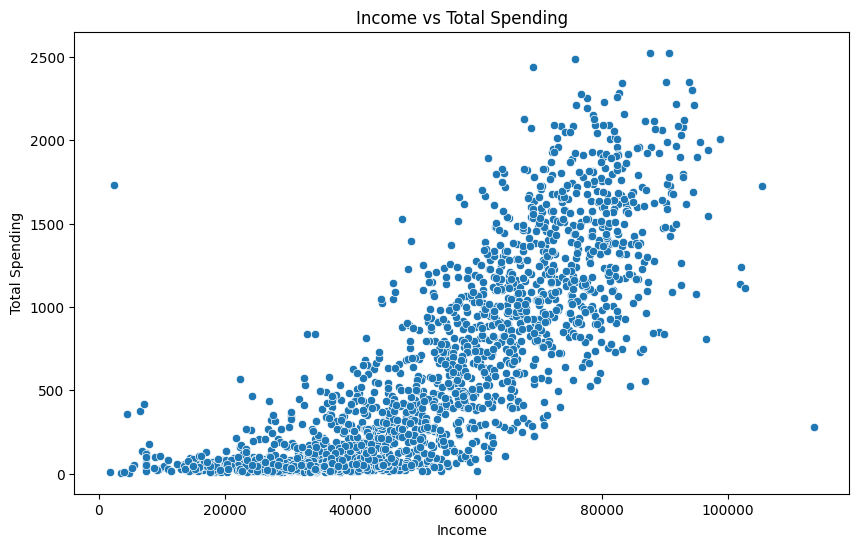

In [ ]:
from scipy.stats import spearmanr

# Calculate total spending
df['TotalSpending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Check for correlation between Income and TotalSpending using Spearman
spearman_corr, spearman_p = spearmanr(df['Income'], df['TotalSpending'])

print("Spearman Correlation:")
print(spearman_corr)
print()
print("P-value:")
print(spearman_p)
print()

if spearman_p < 0.05:
    print("Reject the null hypothesis: There is a significant monotonic relationship between Income and Total Spending.")
    print()
else:
    print("Fail to reject the null hypothesis: There is no significant monotonic relationship between Income and Total Spending.")
    print()

# Visualization: Scatter plot of Income vs Total Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpending', data=df)
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

2:

Null Hypothesis (H0): There is no significant difference in the mean income between customers who accepted the marketing campaign and those who did not.

Alternative Hypothesis (H1): There is a significant difference in the mean income between customers who accepted the marketing campaign and those who did not.

test: t-test to compare the mean income of two groups, such as customers who accepted a marketing campaign versus those who did not.

T-statistic:
-0.5144389258045258

P-value:
0.6069968464537736

Fail to reject the null hypothesis: There is no significant difference in mean income between the two groups.



<ipython-input-58-9afd7434f63e>:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1.dropna(), group2.dropna()], labels=['Accepted Campaign', 'Did Not Accept Campaign'])


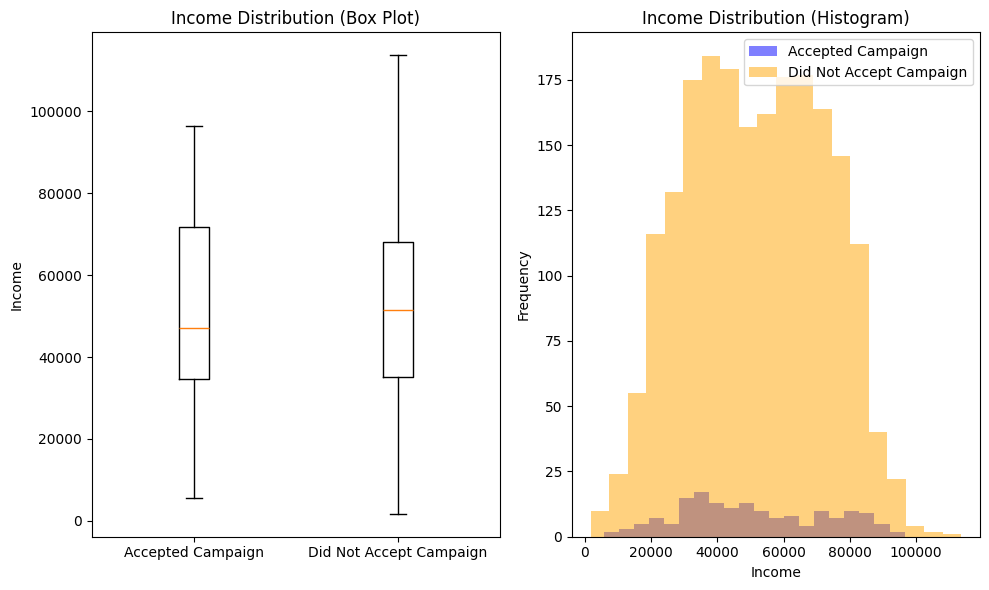

In [ ]:

# Extract income data for the two groups
group1 = df[df['AcceptedCmp3'] == True]['Income']
group2 = df[df['AcceptedCmp3'] == False]['Income']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')

print("T-statistic:")
print(t_stat)
print()
print("P-value:")
print(p_value)
print()


if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in mean income between the two groups.")
    print()
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean income between the two groups.")
    print()

# Plot the income distribution for the two groups
plt.figure(figsize=(10, 6))

# Box plot
plt.subplot(1, 2, 1)
plt.boxplot([group1.dropna(), group2.dropna()], labels=['Accepted Campaign', 'Did Not Accept Campaign'])
plt.title('Income Distribution (Box Plot)')
plt.ylabel('Income')

# Histogram
plt.subplot(1, 2, 2)
plt.hist(group1.dropna(), alpha=0.5, label='Accepted Campaign', bins=20, color='blue')
plt.hist(group2.dropna(), alpha=0.5, label='Did Not Accept Campaign', bins=20, color='orange')
plt.title('Income Distribution (Histogram)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

Customer Demographics and Income Levels Key Finding:


 most of customers were born between the 1960s and 1980s and most of them have a graduation level education. Incomes are mostly between 40,000 and 80,000 and people with higher education levels have higher income.
Insight: Customers with higher education levels is more likely to have higher income making them a prime target for premium products and services.
Strategy:
Marketing Strategy: Tailor marketing campaigns to target higher ncome and well-educated customers with premium product offerings.
Product Development: Develop luxury goods or exclusive services.
Customer Engagement: Offer loyalty programs or discounts to high income customers to increase lifetime value.

Marketing Campaign Effectiveness Key Finding:


The last marketing campaign  was the most successful while the second campaign was the least effective. Customers who accepted the campaign spent significantly more than those who did not.
Insight: Marketing campaigns have a direct effect on customer spending behavior and  some campaigns are more effective than others.
Actionable Strategy:
Marketing Strategy: analyzing  the last campaign factors to point out why it was successful and apply the findings to new campaigns . the factors like :messaging timing or channels. And also do the same thing about the unsuccessful campaigns to discover why they were not successful and do not repeat those factors in new ones. And also those unsuccessful campaigns must be stopped and not to be continued.
Customer Engagement: Use personalised marketing strategis to target customers who are more likely to respond positively to capaigns based on their past behavior.
Product Development: continue products or services that were popular during successful campaigns to have additional sales.

Spending Behavior and Customer Segments Key Finding:


Customers with children spend differently than the ones without children and there is a significant difference in spending across product categories. Wine and meat products are the most popular on the other hand fruits and sweets are less popular.
Insight: Family status and product preferences are important in customer spending behavior.
Actionable Strategy:
Marketing Strategy: Create targeted campaigns for families, emphasizing products that are more likely to be their needs .
Product Development: Focus on promote the product lines that are morely popular (wines and meat products) and reducing less popular products.
Customer Engagement: Offer family promotions or discounts to customers with children to increase their spending.

Education Level and Campaign Acceptance Key Finding:


There is a significant relationship between education and campaign acceptance. Customers with higher education levels are more likely to accept marketing campaign
Insight: Education level is a importent factor to make campaign success because more educated customers are more likely accept them.
Actionable Strategy:
Marketing Strategy: Design campaigns that are appropriate to highly educated customers such as those emphasizing quality and innovation
Customer Engagement: Use educational content in marketing materials to engage this segment such as product tutorials expert reviews or industry insights.
Product Development: Develop products that are at the same level with the values of educated customers such tech products
